# 2401PTDS_Regression_Project

![alt text](agri_image.png)

## Table of contents
 1. Project Overview
 2. Dataset description
 3. Load Packages
 4. Load dataset
 5. Data Inspection
 6. EDA
 7. Data Preprocessing
 8. Train Test Split and Model Training
 9. Evaluate a Regression model performance
 10. Train a Regression Model

## 1. Project Overview <a class="anchor" id="project-description"></a>
Our team of environmental consultants and data scientists has been tasked by a coalition of agricultural stakeholders to analyze and predict the effects of CO2 emissions on climate change within the agri-food sector. These stakeholders include policymakers, agricultural businesses, and environmental organizations. Our goal is to understand how agricultural activities contribute to climate change and to develop strategies for more sustainable practices. Using a comprehensive dataset compiled from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC), we will examine various emission sources, perform regression analyses to predict temperature changes, and provide actionable insights for our stakeholders.

By the end of this project, we aim to have a deep understanding of the impact of agricultural activities on CO2 emissions and climate change. Our findings and recommendations will contribute to ongoing sustainability efforts in the agri-food sector, offering valuable guidance to the stakeholders involved in this initiative.

## 2. Dataset <a class="anchor" id="dataset"></a>
Emissions from the agri-food sector play a crucial role in climate change, as they represent a significant share of global annual emissions. The dataset highlights the substantial contribution of the various sources of emissions. Therefore, it is essential to understand and address the environmental impact of the agri-food industry to mitigate climate change and promote sustainable practices within this sector.

**Dataset Features:**
- Savanna fires: Emissions from fires in savanna ecosystems.
- Forest fires: Emissions from fires in forested areas.
- Crop Residues: Emissions from burning or decomposing leftover plant material after crop harvesting.
- Rice Cultivation: Emissions from methane released during rice cultivation.
- Drained organic soils (CO2): Emissions from carbon dioxide released when draining organic soils.
- Pesticides Manufacturing: Emissions from the production of pesticides.
- Food Transport: Emissions from transporting food products.
- Forestland: Land covered by forests.
- Net Forest conversion: Change in forest area due to deforestation and afforestation.
- Food Household Consumption: Emissions from food consumption at the household level.
- Food Retail: Emissions from the operation of retail establishments selling food.
- On-farm Electricity Use: Electricity consumption on farms.
- Food Packaging: Emissions from the production and disposal of food packaging materials.
- Agrifood Systems Waste Disposal: Emissions from waste disposal in the agrifood system.
- Food Processing: Emissions from processing food products.
- Fertilizers Manufacturing: Emissions from the production of fertilizers.
- IPPU: Emissions from industrial processes and product use.
- Manure applied to Soils: Emissions from applying animal manure to agricultural soils.
- Manure left on Pasture: Emissions from animal manure on pasture or grazing land.
- Manure Management: Emissions from managing and treating animal manure.
- Fires in organic soils: Emissions from fires in organic soils.
- Fires in humid tropical forests: Emissions from fires in humid tropical forests.
- On-farm energy use: Energy consumption on farms.
- Rural population: Number of people living in rural areas.
- Urban population: Number of people living in urban areas.
- Total Population - Male: Total number of male individuals in the population.
- Total Population - Female: Total number of female individuals in the population.
- total_emission: Total greenhouse gas emissions from various sources.
- Average Temperature °C: The average increasing of temperature (by year) in degrees Celsius,
 

CO2 is recorded in kilotonnes (kt): 1 kt represents 1000 kg of CO2.

The feature "Average Temperature C°", represents the average yearly temperature increase. For example, if it is 0.12, it means that the temperature in that specific location increased by 0.12 degrees Celsius.

Forestland is the only feature that exhibits negative emissions due to its role as a carbon sink. Through photosynthesis, forests absorb and store carbon dioxide, effectively removing it from the atmosphere. Sustainable forest management, along with afforestation and reforestation efforts, further contribute to negative emissions by increasing carbon sequestration capacity.


### 1. Load  Packages and Dataset

In [1]:
#import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import randint
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [9]:
# Loading the dataset
df=pd.read_csv("co2_emissions_from_agri.csv")

#Displaying the first five rows
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


### 5. Data Inspection

Checking for missing values, data types, and general stastics.

In [10]:
# checking for missing values
df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [6]:
df.dtypes

Area                                object
Year                                 int64
Savanna fires                      float64
Forest fires                       float64
Crop Residues                      float64
Rice Cultivation                   float64
Drained organic soils (CO2)        float64
Pesticides Manufacturing           float64
Food Transport                     float64
Forestland                         float64
Net Forest conversion              float64
Food Household Consumption         float64
Food Retail                        float64
On-farm Electricity Use            float64
Food Packaging                     float64
Agrifood Systems Waste Disposal    float64
Food Processing                    float64
Fertilizers Manufacturing          float64
IPPU                               float64
Manure applied to Soils            float64
Manure left on Pasture             float64
Manure Management                  float64
Fires in organic soils             float64
Fires in hu

In [7]:
df.describe()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
count,6965.000000,6934.000000,6872.000000,5576.000000,6965.000000,6965.000000,6965.000000,6965.000000,6472.000000,6.472000e+03,...,6037.000000,6965.000000,6810.000000,6009.000000,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6.965000e+03,6965.000000
mean,2005.124910,1188.390893,919.302167,998.706309,4259.666673,3503.228636,333.418393,1939.581760,-17828.285678,1.760564e+04,...,2263.344946,1210.315532,668.452931,3008.982252,1.785774e+07,1.693230e+07,1.761963e+07,1.732447e+07,6.409124e+04,0.872989
std,8.894665,5246.287783,3720.078752,3700.345330,17613.825187,15861.445678,1429.159367,5616.748808,81832.210543,1.011575e+05,...,7980.542461,22669.847760,3264.879486,12637.864430,8.901521e+07,6.574362e+07,7.603993e+07,7.251711e+07,2.283130e+05,0.555930
min,1990.000000,0.000000,0.000000,0.000200,0.000000,0.000000,0.000000,0.000100,-797183.079000,0.000000e+00,...,0.432900,0.000000,0.000000,0.031900,0.000000e+00,0.000000e+00,2.500000e+02,2.700000e+02,-3.918841e+05,-1.415833
25%,1997.000000,0.000000,0.000000,11.006525,181.260800,0.000000,6.000000,27.958600,-2848.350000,0.000000e+00,...,37.632100,0.000000,0.000000,13.291900,9.731100e+04,2.173860e+05,2.013260e+05,2.078900e+05,5.221244e+03,0.511333
50%,2005.000000,1.651850,0.517900,103.698200,534.817400,0.000000,13.000000,204.962800,-62.920000,4.444000e+01,...,269.856300,0.000000,0.000000,141.096300,1.595322e+06,2.357581e+06,2.469660e+06,2.444135e+06,1.214765e+04,0.834300
75%,2013.000000,111.081400,64.950775,377.640975,1536.640000,690.408800,116.325487,1207.000900,0.000000,4.701746e+03,...,1126.818900,0.000000,9.577875,1136.925400,8.177340e+06,8.277123e+06,9.075924e+06,9.112588e+06,3.513973e+04,1.206750
max,2020.000000,114616.401100,52227.630600,33490.074100,164915.255600,241025.069600,16459.000000,67945.765000,171121.076000,1.605106e+06,...,70592.646500,991717.543100,51771.256800,248879.176900,9.000991e+08,9.020778e+08,7.435866e+08,7.133419e+08,3.115114e+06,3.558083


In [15]:
df1=pd.read_csv("co2_emissions_from_agri.csv",usecols=['Area','Year','Crop Residues','Food Transport','Rice Cultivation','Drained organic soils (CO2)','Manure left on Pasture','total_emission','Forest fires','Savanna fires','Fires in organic soils','Fires in humid tropical forests','Net Forest conversion'])

In [12]:
df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [63]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Net Forest conversion,Manure left on Pasture,Fires in organic soils,Fires in humid tropical forests,total_emission
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,0.0,1590.5319,0.0,0.0,2198.963539
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,0.0,1657.2364,0.0,0.0,2323.876629
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,0.0,1653.5068,0.0,0.0,2356.304229
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,0.0,1642.9623,0.0,0.0,2368.470529
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,0.0,1689.3593,0.0,0.0,2500.768729


In [64]:
df.tail()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Net Forest conversion,Manure left on Pasture,Fires in organic soils,Fires in humid tropical forests,total_emission
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,10662.4408,2721.1459,0.0,0.0,98491.026347
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,10662.4408,2744.8763,0.0,0.0,97159.311553
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,10662.4408,2790.0949,0.0,0.0,97668.308205
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,10662.4408,2828.7215,0.0,0.0,98988.062799
6964,Zimbabwe,2020,481.9027,48.4197,108.3022,7.9733,0.0,10662.4408,2829.7457,0.0,0.0,96505.221853


In [7]:
df.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [16]:
df1.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Food Transport,Net Forest conversion,Manure left on Pasture,Fires in organic soils,Fires in humid tropical forests,total_emission
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,63.1152,0.0,1590.5319,0.0,0.0,2198.963539
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,61.2125,0.0,1657.2364,0.0,0.0,2323.876629
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,53.3170,0.0,1653.5068,0.0,0.0,2356.304229
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,54.3617,0.0,1642.9623,0.0,0.0,2368.470529
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,53.9874,0.0,1689.3593,0.0,0.0,2500.768729


In [17]:
df1.isnull().sum()

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Food Transport                        0
Net Forest conversion               493
Manure left on Pasture                0
Fires in organic soils                0
Fires in humid tropical forests     155
total_emission                        0
dtype: int64

In [18]:
df1.fillna(0,inplace=True)

In [20]:
df1.isnull().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Food Transport                     0
Net Forest conversion              0
Manure left on Pasture             0
Fires in organic soils             0
Fires in humid tropical forests    0
total_emission                     0
dtype: int64

In [13]:
#df_mean=df.fillna(df.mean())
numeric_cols = df.select_dtypes(include='number')
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

In [14]:
df.isnull().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Pesticides Manufacturing           0
Food Transport                     0
Forestland                         0
Net Forest conversion              0
Food Household Consumption         0
Food Retail                        0
On-farm Electricity Use            0
Food Packaging                     0
Agrifood Systems Waste Disposal    0
Food Processing                    0
Fertilizers Manufacturing          0
IPPU                               0
Manure applied to Soils            0
Manure left on Pasture             0
Manure Management                  0
Fires in organic soils             0
Fires in humid tropical forests    0
On-farm energy use                 0
Rural population                   0
Urban population                   0
T

In [17]:
#df1=df.fillna(0)

In [18]:
df1.isnull().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Food Transport                     0
Net Forest conversion              0
Manure left on Pasture             0
Fires in organic soils             0
Fires in humid tropical forests    0
total_emission                     0
dtype: int64

In [48]:
df.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


### Step 3: Exploratory Data Analysis(EDA)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

**Firstly we will focus on these key Emission-Related Variables for these specific reasons:**
- Crop Residues: Leftover plant material from crops can release CO₂ when decomposed or burned.

- Rice Cultivation: Known to contribute significantly to methane emissions, a potent greenhouse gas.
- Drained Organic Soils (CO₂): Draining organic soils releases CO₂, as organic carbon is oxidized.
- Manure Left on Pasture: Manure contributes to both CO₂ and methane emissions depending on its management.
- Forest Fires, Savanna Fires, Fires in Organic Soils, Fires in Humid Tropical Forests: These are significant sources of CO₂ and should be included as they directly contribute to emissions.
- Net Forest Conversion, Forestland: Deforestation and changes in forestland significantly impact CO₂ levels.

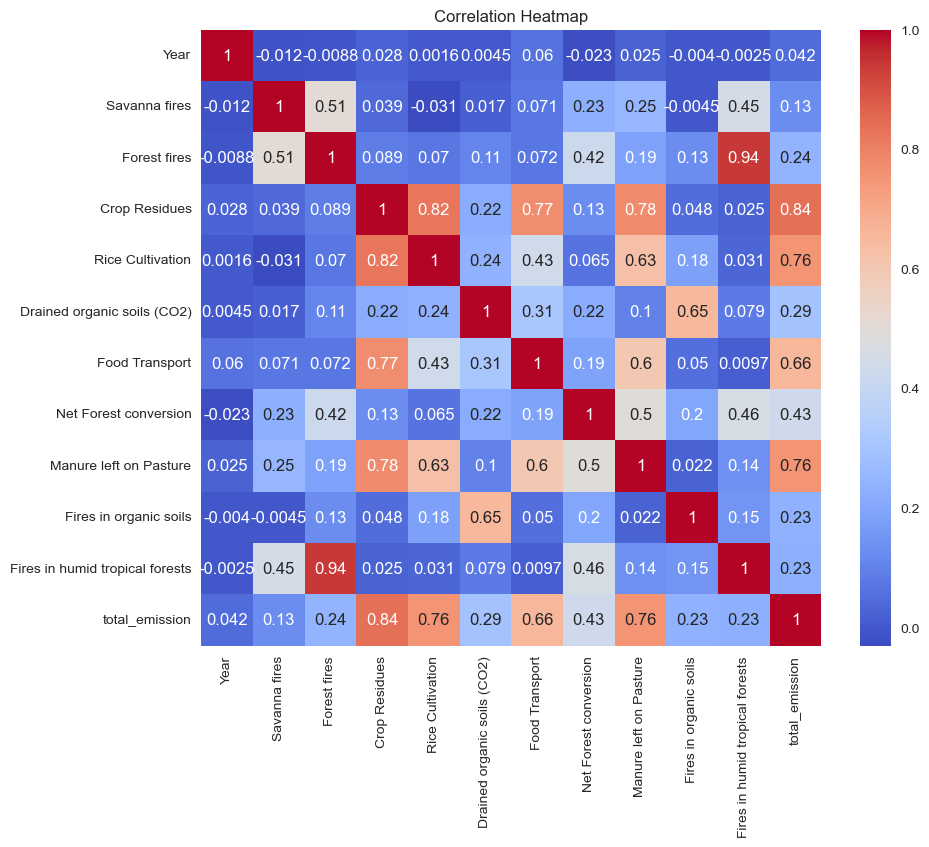

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

### 1. High Positive Correlations:
- **Forest fires and Fires in humid tropical forests**: these two have a very high positive correlation(0.94), suggesting that when forest fires increase, fires in humid tropical forests tend to increase as well, and vice versa.

- **Crop Residues and Rice Cultivation**: These variables are highly correlated (0.83), implying that areas with high crop residue burning also tend to have significant rice cultivation, which could be related to agricultural practices that overlap.

- **Savanna fires and Forest fires**: These are moderately correlated (0.51), indicating that fires in savannas often coincide with forest fires, potentially due to similar climatic or regional factors.

### 2. Moderate Positive Correlations:

- **Net Forest conversion with Forest fires and Savanna fires**: There are moderate positive correlations here (0.42 and 0.23, respectively). This suggests that areas with more deforestation (net forest conversion) may see more fires, which could be due to land clearing methods that involve burning.

- **Manure left on Pasture with Crop Residues and Rice Cultivation**: Manure left on pasture shows moderate correlations with crop residues (0.78) and rice cultivation (0.63), suggesting these agricultural activities are often found together or in areas with similar land-use practices.

### 3. Negative Correlations:
There are very few instances of negative correlations in the heatmap, suggesting that most of these factors either tend to increase or decrease together rather than inversely.


In [20]:
df1.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Food Transport,Net Forest conversion,Manure left on Pasture,Fires in organic soils,Fires in humid tropical forests,total_emission
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,63.1152,0.0,1590.5319,0.0,0.0,2198.963539
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,61.2125,0.0,1657.2364,0.0,0.0,2323.876629
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,53.3170,0.0,1653.5068,0.0,0.0,2356.304229
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,54.3617,0.0,1642.9623,0.0,0.0,2368.470529
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,53.9874,0.0,1689.3593,0.0,0.0,2500.768729


In [21]:
df.columns

Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')

In [22]:
column_names=['Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female','Average Temperature °C']

In [54]:
target = df['total_emission']

In [55]:
emissions_fact=df[column_names]

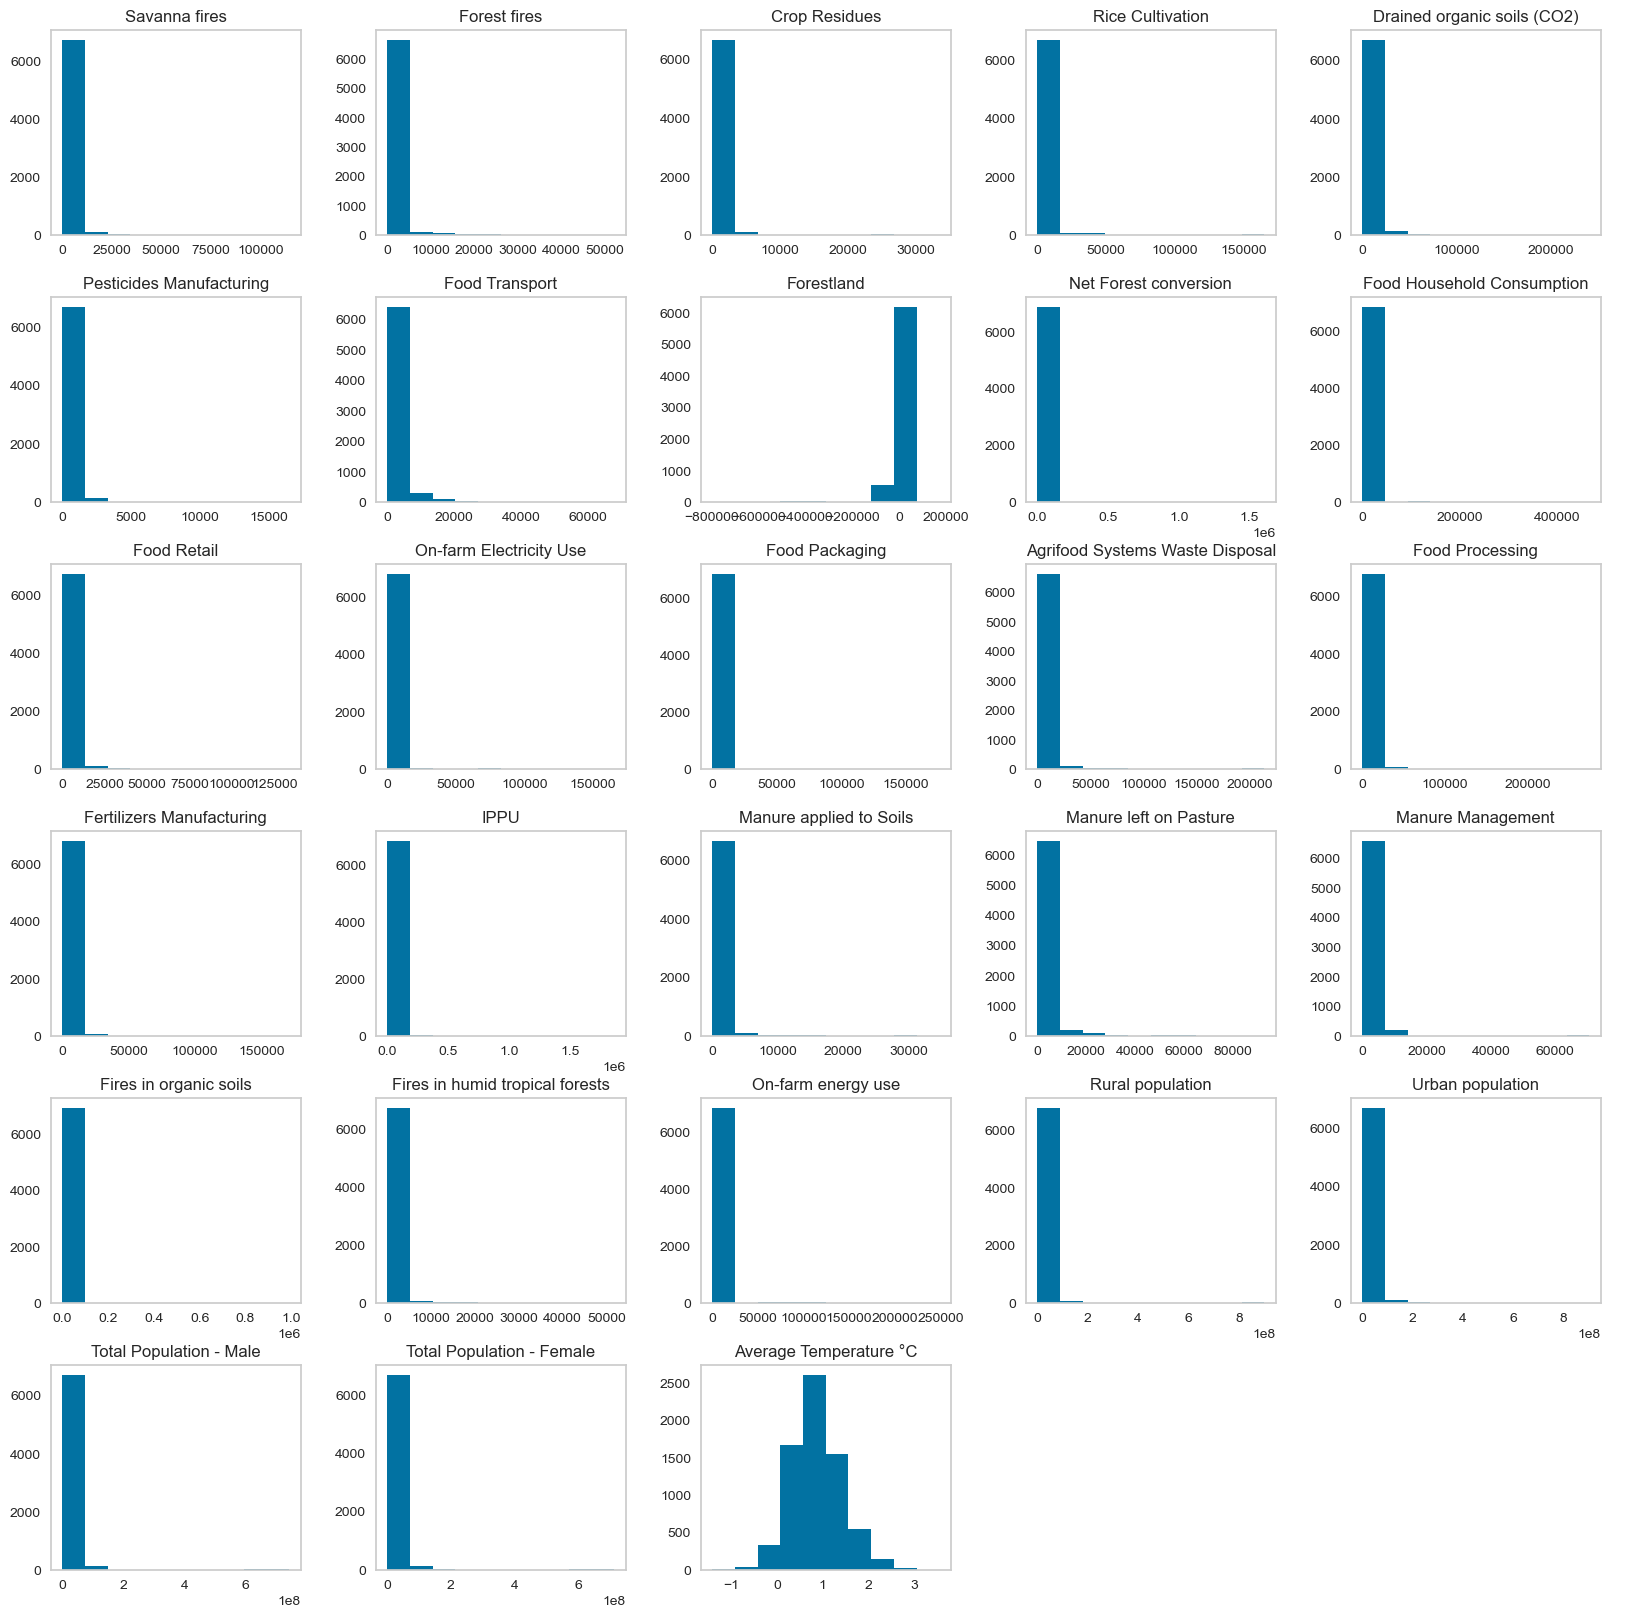

In [56]:
emissions_fact.hist(figsize=(20,20),grid=False)
plt.show()

In [ ]:
df2=pd.read_csv('co2_emissions_from_agri.csv',usecols=['total_emission','Rice Cultivation', 'Food Transport', 'On-farm Electricity Use', 'Fertilizers Manufacturing'])

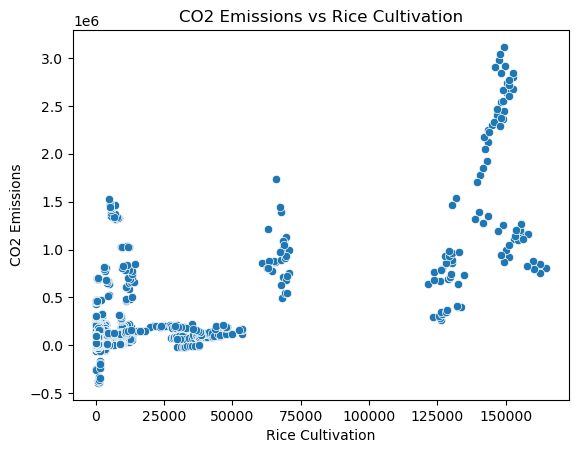

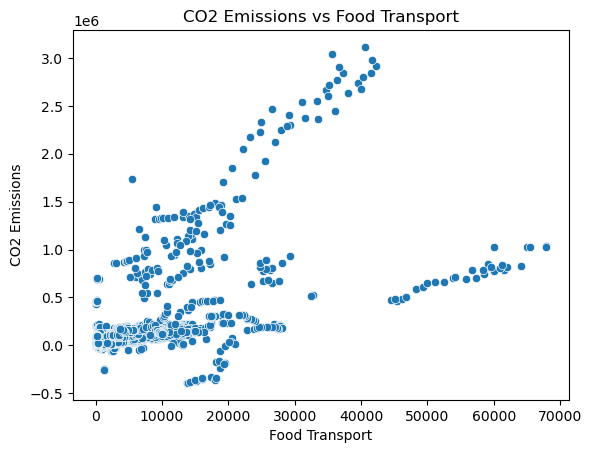

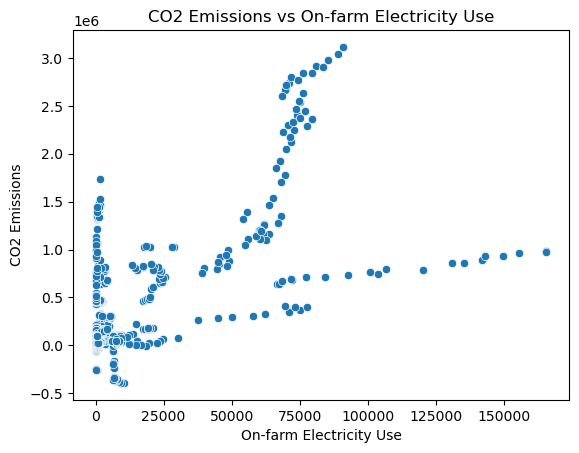

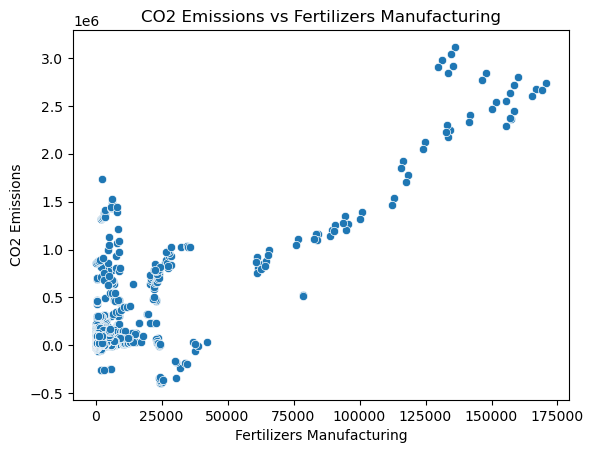

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of CO2 emissions vs key agricultural variables
for column in ['Rice Cultivation', 'Food Transport', 'On-farm Electricity Use', 'Fertilizers Manufacturing']:
    plt.figure()
    sns.scatterplot(x=df2[column], y=df['total_emission'])
    plt.title(f'CO2 Emissions vs {column}')
    plt.xlabel(column)
    plt.ylabel('CO2 Emissions')
    plt.show()


In [93]:
df4=pd.read_csv("co2_emissions_from_agri.csv",usecols=['Savanna fires', 'Forest fires', 'Crop Residues','Drained organic soils (CO2)', 'Food Transport',
       'Net Forest conversion', 'Manure left on Pasture','Fires in organic soils', 'Fires in humid tropical forests','total_emission'])

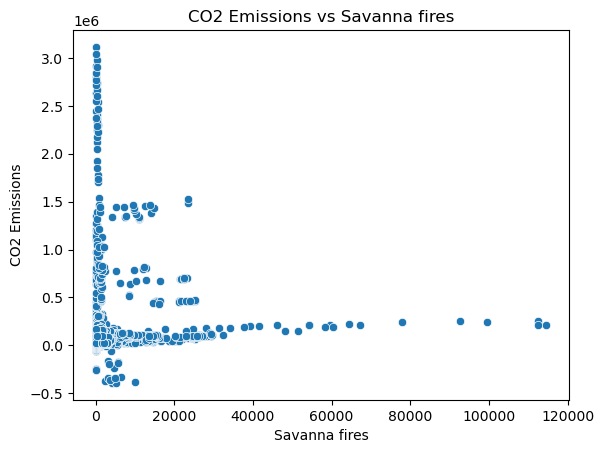

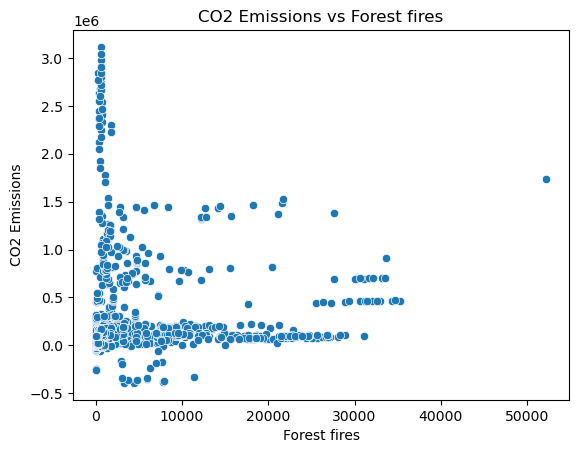

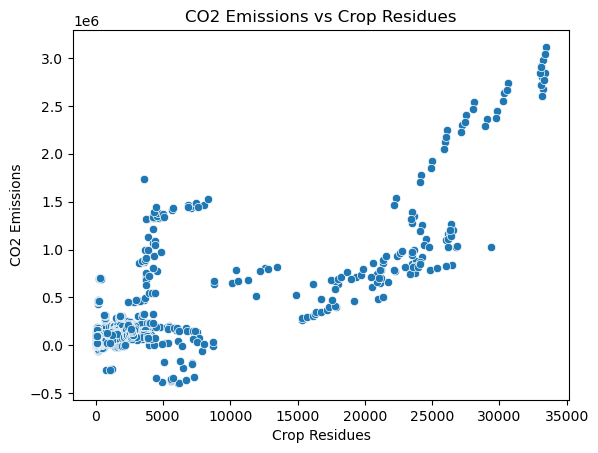

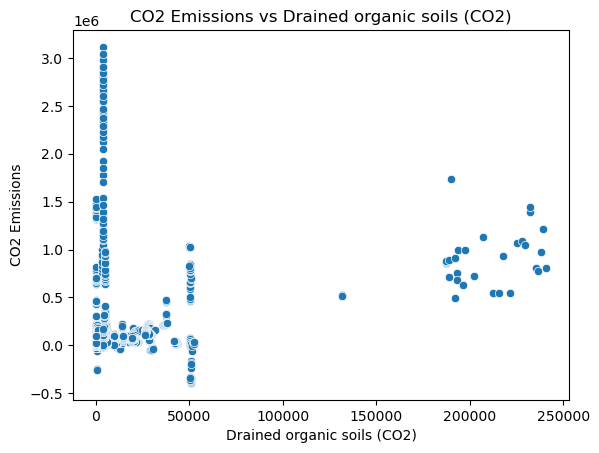

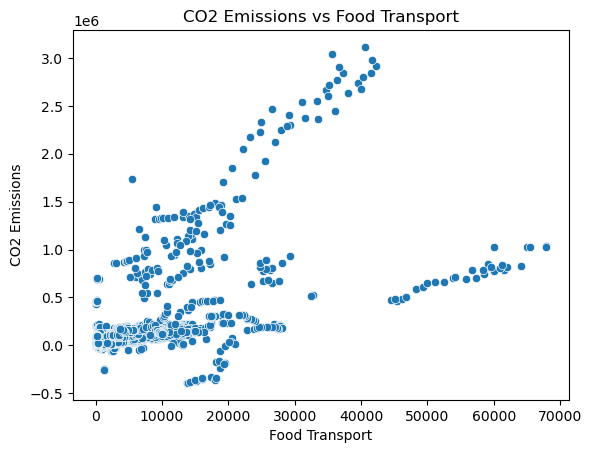

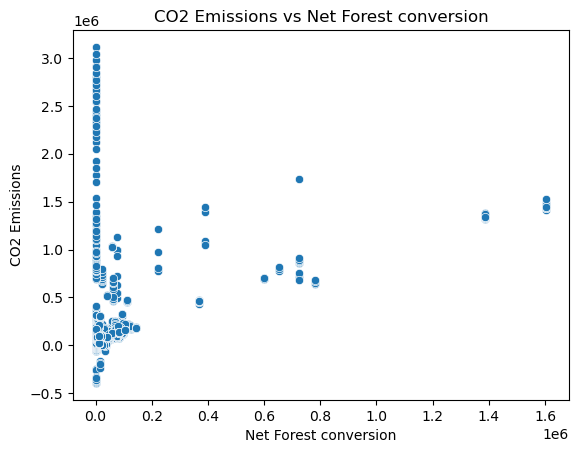

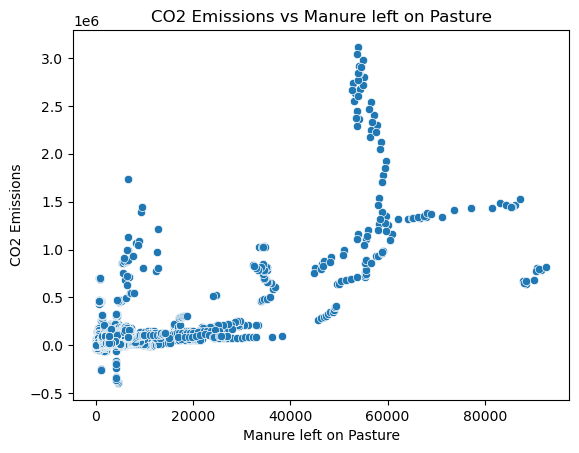

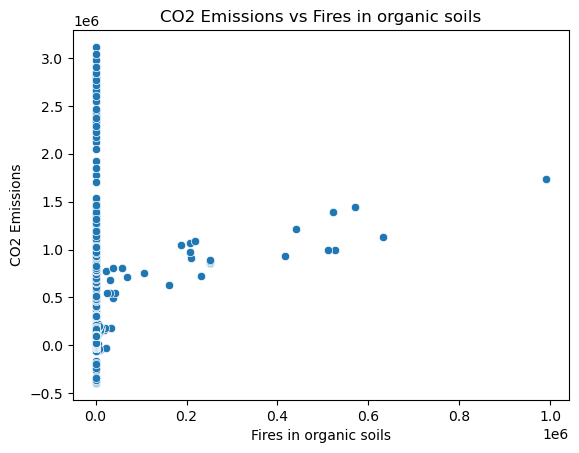

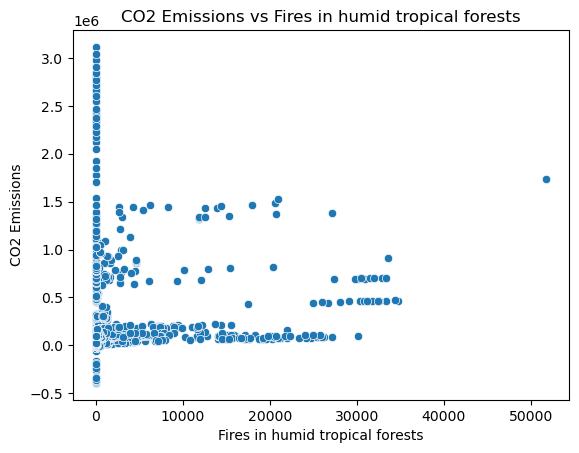

In [95]:
# Scatter plot of CO2 emissions vs key agricultural variables
for column in ['Savanna fires', 'Forest fires', 'Crop Residues','Drained organic soils (CO2)', 'Food Transport','Net Forest conversion', 'Manure left on Pasture','Fires in organic soils', 'Fires in humid tropical forests']:
    plt.figure()
    sns.scatterplot(x=df4[column], y=df['total_emission'])
    plt.title(f'CO2 Emissions vs {column}')
    plt.xlabel(column)
    plt.ylabel('CO2 Emissions')
    plt.show()

### Step 4: Data Preprocessing

- checking if there any more missing values and then we prepare for regression

In [96]:
df1.isnull().sum()

Area                               0
Year                               0
Savanna fires                      0
Forest fires                       0
Crop Residues                      0
Rice Cultivation                   0
Drained organic soils (CO2)        0
Food Transport                     0
Net Forest conversion              0
Manure left on Pasture             0
Fires in organic soils             0
Fires in humid tropical forests    0
total_emission                     0
dtype: int64

In [112]:
#check for categorical columns and encode them if needed
#categorical_columns=df1.select_dtypes(include=['object']).columns
#data=pd.get_dummies(df1,columns=categorical_columns,drop_first=True)

In [107]:
df1.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Food Transport,Net Forest conversion,Manure left on Pasture,Fires in organic soils,Fires in humid tropical forests,total_emission
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,63.1152,0.0,1590.5319,0.0,0.0,2198.963539
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,61.2125,0.0,1657.2364,0.0,0.0,2323.876629
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,53.3170,0.0,1653.5068,0.0,0.0,2356.304229
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,54.3617,0.0,1642.9623,0.0,0.0,2368.470529
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,53.9874,0.0,1689.3593,0.0,0.0,2500.768729


In [1]:
#!pip install lux-api --user
#!jupyter nbextension install --py luxwidget --user
#!jupyter nbextension enable luxwidget --user --py

Enabling notebook extension luxwidget/extension...
      - Validating: OK


In [1]:
import luxwidget

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
from sklearn.preprocessing import StandardScaler


In [3]:
#!pip install yellowbrick
#import yellowbrick
#from yellowbrick.regressor import PredictionError, ResidualsPlot

In [10]:
df

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,...,319.1763,0.0,0.0,3008.982252,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,...,342.3079,0.0,0.0,3008.982252,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,...,349.1224,0.0,0.0,3008.982252,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,...,352.2947,0.0,0.0,3008.982252,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,...,367.6784,0.0,0.0,3008.982252,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,Zimbabwe,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,...,282.5994,0.0,0.0,417.315000,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347,1.120250
6961,Zimbabwe,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,...,255.5900,0.0,0.0,398.164400,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553,0.046500
6962,Zimbabwe,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,...,257.2735,0.0,0.0,465.773500,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205,0.516333
6963,Zimbabwe,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,...,267.5224,0.0,0.0,444.233500,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799,0.985667


### Step 5: Train Test Split and Model Training

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [24]:
# Separating features and target 
X=df.drop(columns=['total_emission'])
y=df['total_emission']

In [128]:
# Identify categorical columns
categorical_columns=X.select_dtypes(include=['object']).columns

In [129]:
# applying the OneHotEncoding to categorical columns
X=pd.get_dummies(X, columns=categorical_columns,drop_first=True)

In [130]:
X.head()

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Food Transport,Net Forest conversion,Manure left on Pasture,Fires in organic soils,...,Area_Uzbekistan,Area_Vanuatu,Area_Venezuela (Bolivarian Republic of),Area_Viet Nam,Area_Wallis and Futuna Islands,Area_Western Sahara,Area_Yemen,Area_Yugoslav SFR,Area_Zambia,Area_Zimbabwe
0,1990,14.7237,0.0557,205.6077,686.00,0.0,63.1152,0.0,1590.5319,0.0,...,0,0,0,0,0,0,0,0,0,0
1,1991,14.7237,0.0557,209.4971,678.16,0.0,61.2125,0.0,1657.2364,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1992,14.7237,0.0557,196.5341,686.00,0.0,53.3170,0.0,1653.5068,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1993,14.7237,0.0557,230.8175,686.00,0.0,54.3617,0.0,1642.9623,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1994,14.7237,0.0557,242.0494,705.60,0.0,53.9874,0.0,1689.3593,0.0,...,0,0,0,0,0,0,0,0,0,0


In [134]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [135]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((5572, 246), (1393, 246), (5572,), (1393,))

In [136]:
# fitting the model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [138]:
y_predict=model.predict(X_test)

In [139]:
y_predict,y_test

(array([ 27464.24241329,   2919.87717467, 147329.84616819, ...,
          4787.54106427,  18740.39639865,   4730.36795283]),
 1335      9797.212910
 5679      7787.792976
 5962    101066.468635
 37        3231.956747
 5939     10488.420496
             ...      
 533       1793.663214
 2375      7402.102213
 2184     14188.460658
 652      21904.469472
 33        5221.131572
 Name: total_emission, Length: 1393, dtype: float64)

In [27]:
# Importing additional necessary libraries for regression models and metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Placeholder variables for storing model evaluation results
model_results = {}

# Extracting features (X) and target (y) based on previous notebook setup
# Note: Assuming 'total_emission' is the target column and 'df1' is preprocessed data
# As the dataset is loaded and preprocessed within the notebook, we need to simulate this step for our environment.

# Placeholder function to simulate model training and evaluation in a notebook setting.
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Train and evaluate the model, storing results in the model_results dictionary."""
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    model_results[model_name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

    return y_pred

# Prepare the placeholders for data (simulating X_train, X_test, y_train, y_test as per notebook context)
X_train, X_test, y_train, y_test = None, None, None, None  # To be filled from notebook context


In [28]:
from sklearn.model_selection import train_test_split

# Assuming df is your DataFrame and 'total_emission' is the target column
#X = df.drop(columns=['total_emission'])  # Features (independent variables)
#y = df['total_emission']                 # Target (dependent variable)

# Optional: Perform one-hot encoding if there are categorical variables in X
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
#dt_model = DecisionTreeRegressor(random_state=42)

In [6]:
#dt_predictions = train_and_evaluate_model(dt_model, X_train, X_test, y_train, y_test, "Decision Tree")

In [4]:
#rf_model = RandomForestRegressor(random_state=42)

In [7]:
#rf_predictions = train_and_evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest")


### Step 6: Evaluate a Regression model performance

In [ ]:
# good model - the mean squared error for the linear regression model should be a lot smaller than the mean squared error for the simple model
# r squared score should be close to 1

In [145]:
from sklearn.metrics import r2_score
import numpy as np

In [141]:
r2_score(y_test, y_predict)

0.965394808307021

In [142]:
mean_absolute_error(y_test,y_predict)

16570.998248086584

In [143]:
mean_squared_error(y_test, y_predict)

2393764125.3216295

In [147]:
np.sqrt(mean_squared_error(y_test, y_predict))

48926.10883078307

In [148]:
df1.head()

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Food Transport,Net Forest conversion,Manure left on Pasture,Fires in organic soils,Fires in humid tropical forests,total_emission
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,63.1152,0.0,1590.5319,0.0,0.0,2198.963539
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,61.2125,0.0,1657.2364,0.0,0.0,2323.876629
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,53.3170,0.0,1653.5068,0.0,0.0,2356.304229
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,54.3617,0.0,1642.9623,0.0,0.0,2368.470529
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,53.9874,0.0,1689.3593,0.0,0.0,2500.768729


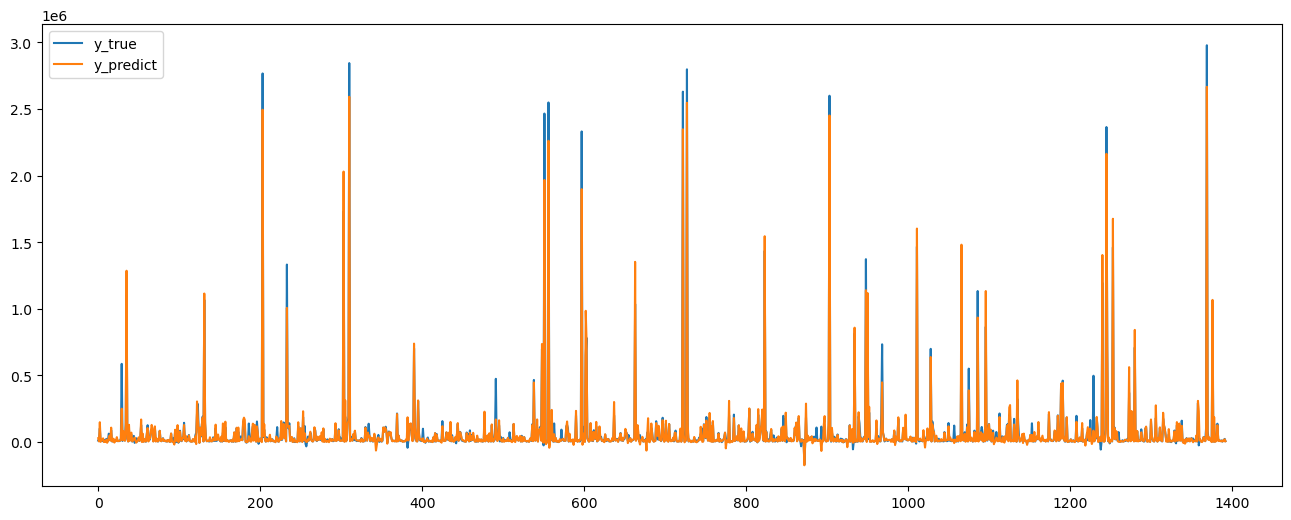

In [150]:
plt.subplots(figsize=(16,6))
x_points=list(range(len(y_test)))
plt.plot(x_points, y_test,label='y_true')
plt.plot(x_points,y_predict,label='y_predict')
plt.legend()
plt.show()

### Step 7: Train a Regression Model

Using a Linear Regression model to analyze the impact.

In [103]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [104]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict on test set
y_pred = model.predict(X_test)

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 16570.998248086584
Mean Squared Error (MSE): 2393764125.3216295
Root Mean Squared Error (RMSE): 48926.10883078307
R-squared (R²): 0.965394808307021
